In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt

In [5]:
import os
import json

In [6]:
def get_graphics(dir_path="/content/drive/My Drive/severstal/log"):

    for folder in ['losses', 'metric']:
        path = os.path.join(dir_path, folder)
        file_list = os.listdir(path)
        full_list = [os.path.join(path, i) for i in file_list]
        time_sorted_list = sorted(full_list, key=os.path.getmtime, reverse=True)
        last_log = time_sorted_list[0]

        if folder == 'losses':
            with open(os.path.join(path, last_log)) as json_file:
                loss = json.load(json_file)
        else:
            with open(os.path.join(path, last_log)) as json_file:
                metric = json.load(json_file)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 15))
    fig.suptitle('Logger')


    ax1.plot(loss['train'], 'o-', color='blue', label='train')
    ax1.set_ylabel('loss')
    ax1.plot(loss['val'], 'o-', color='green', label='validation')
    ax1.set_xlabel('epochs')
    ax1.grid()
    ax1.legend()

    ax2.plot(metric['train']['dice'], 'o-', color='blue' , label='train')
    ax2.set_xlabel('epochs')
    ax2.plot(metric['val']['dice'], 'o-', color='green', label='validation')
    ax2.set_ylabel('Dice')
    ax2.grid()
    ax2.legend()

    ax3.plot(metric['train']['pixel_acc'], 'o-', color='blue', label='train')
    ax3.set_xlabel('epochs')
    ax3.plot(metric['val']['pixel_acc'], 'o-', color='green', label='validation')
    ax3.set_ylabel('Pixel_accuracy')
    ax3.grid()
    ax3.legend()

    plt.show()

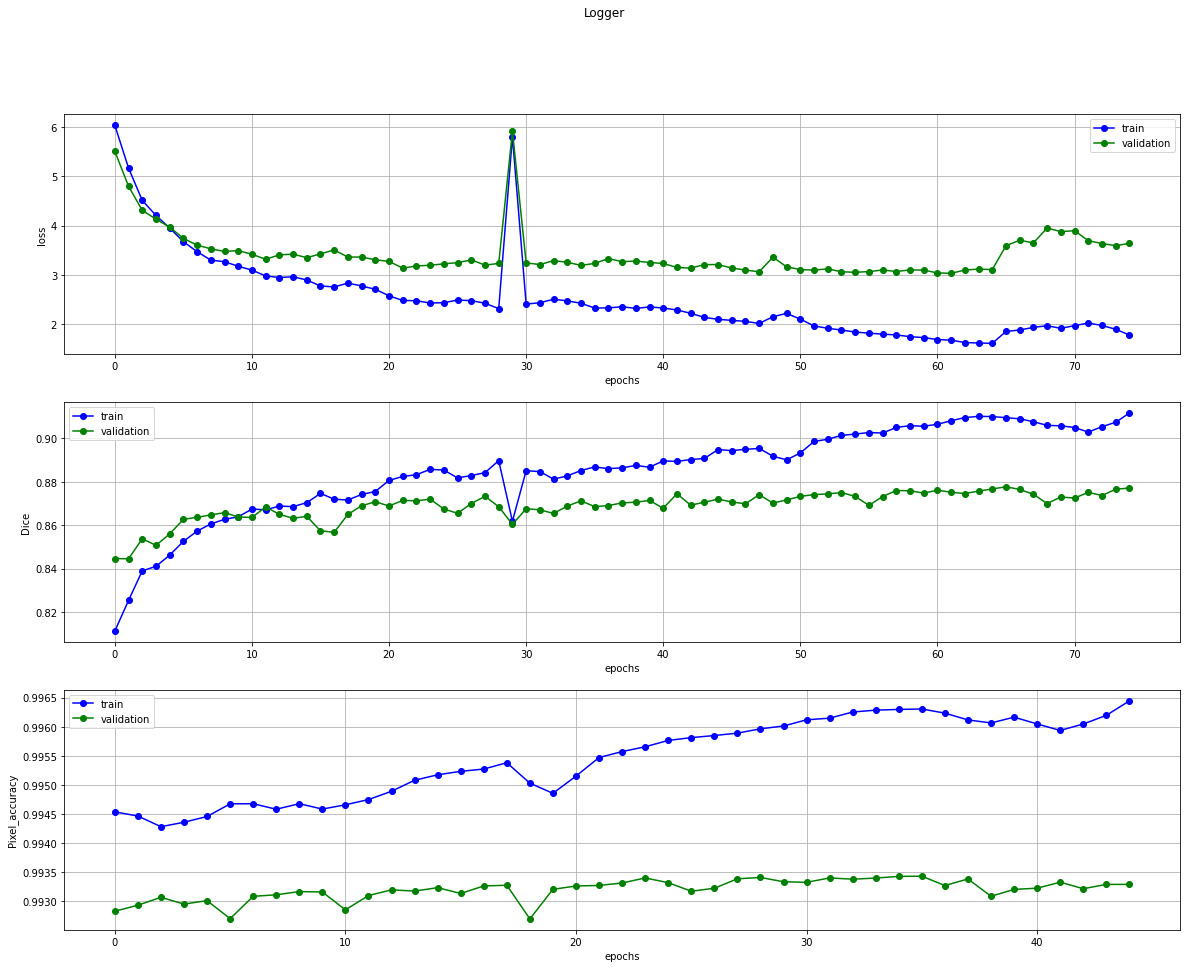

In [7]:
get_graphics()

In [ ]:
#loss